**목적**
- 스포츠 센터 고객 데이터를 통해 고객 행동을 분석하고 파악하는 노하우 학습
- 탈퇴 회원과 지속 회원의 차이 파악 (이탈 회원의 특징은?)

**정보**
- 회원 구분: 종일/주간/야간 회원
- 비정기적인 행사를 진행하여 신규회원 모집
- 탈퇴 신청 시 그 다음 말에 탈퇴 처리됨
- 데이터 설명
    1. use_log.csv
        - 회원별 센터 이용 이력 (201804~201903)
    2. customer_master.csv
        - 회원 데이터 (2019년 3월말 시점)
    3. class_master.csv
        - 회원 구분 (종일, 주간, 야간)
    4. campaign_master.csv
        - 가입 시 행사 종류 (입회비 유무 등)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#데이터-파악-및-가공" data-toc-modified-id="데이터-파악-및-가공-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 파악 및 가공</a></span><ul class="toc-item"><li><span><a href="#데이터-결합" data-toc-modified-id="데이터-결합-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>데이터 결합</a></span></li><li><span><a href="#전체-현황-파악" data-toc-modified-id="전체-현황-파악-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>전체 현황 파악</a></span></li><li><span><a href="#최근-월-(201903)-현황-파악" data-toc-modified-id="최근-월-(201903)-현황-파악-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>최근 월 (201903) 현황 파악</a></span></li><li><span><a href="#고객별-이용-이력" data-toc-modified-id="고객별-이용-이력-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>고객별 이용 이력</a></span></li><li><span><a href="#정기-이용-flag" data-toc-modified-id="정기-이용-flag-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>정기 이용 flag</a></span></li><li><span><a href="#고객-데이터와-이용-이력-데이터-결합" data-toc-modified-id="고객-데이터와-이용-이력-데이터-결합-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>고객 데이터와 이용 이력 데이터 결합</a></span></li><li><span><a href="#회원-기간(월-단위)-추가" data-toc-modified-id="회원-기간(월-단위)-추가-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>회원 기간(월 단위) 추가</a></span></li></ul></li><li><span><a href="#고객-행동-분석" data-toc-modified-id="고객-행동-분석-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>고객 행동 분석</a></span><ul class="toc-item"><li><span><a href="#기초통계량" data-toc-modified-id="기초통계량-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>기초통계량</a></span></li><li><span><a href="#정기-이용-count" data-toc-modified-id="정기-이용-count-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>정기 이용 count</a></span></li><li><span><a href="#회원-기간-분포" data-toc-modified-id="회원-기간-분포-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>회원 기간 분포</a></span></li><li><span><a href="#탈퇴-회원-특징-파악" data-toc-modified-id="탈퇴-회원-특징-파악-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>탈퇴 회원 특징 파악</a></span></li></ul></li></ul></div>

In [35]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [2]:
use_log = pd.read_csv('data_code/3장/use_log.csv')
print(use_log.shape)
use_log.head()

(197428, 3)


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
customer = pd.read_csv('data_code/3장/customer_master.csv')
print(customer.shape)
customer.head()

(4192, 8)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [4]:
class_master = pd.read_csv('data_code/3장/class_master.csv')
print(class_master.shape)
class_master.head()

(3, 3)


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [5]:
campaign_master = pd.read_csv('data_code/3장/campaign_master.csv')
print(campaign_master.shape)
campaign_master.head()

(3, 2)


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


# 데이터 파악 및 가공

## 데이터 결합
- customer data 중심으로 calss_master, campaign_master 결합

In [6]:
customer.shape

(4192, 8)

In [7]:
customer_join = pd.merge(customer, class_master, on='class', how='left')
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')
print(customer_join.shape)
customer_join.head()

(4192, 11)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [8]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

- end_date에서 결측치는 탈퇴하지 않은 회원의 탈퇴일이 없기 때문

In [9]:
# 탈퇴한 회원과 지속 회원 수
customer_join['is_deleted'].value_counts()

0    2842
1    1350
Name: is_deleted, dtype: int64

## 전체 현황 파악
- 어떤 회원/캠페인이 많은지, 언제 입회/탈퇴가 많은지, 남녀 비율, 입회 ~ 탈퇴까지 기간 등

In [10]:
# 회원 구분 현황
customer_join['class_name'].value_counts()

0_종일    2045
2_야간    1128
1_주간    1019
Name: class_name, dtype: int64

- 종일 회원이 거의 절반 차치하며, 야간, 주간 순으로 많음

In [11]:
# 캠페인 현황
customer_join['campaign_name'].value_counts()

2_일반         3050
0_입회비반액할인     650
1_입회비무료       492
Name: campaign_name, dtype: int64

In [12]:
(650+492)/(3050+650+492)

0.2724236641221374

- 일반 입회가 많으며, 캠페인으로 인한 유입(입회비반액할인, 입회비 무료)은 약 27% 정도

In [13]:
# 성별 현황
customer_join['gender'].value_counts()

M    2209
F    1983
Name: gender, dtype: int64

- 남자 회원이 조금 더 많음

In [14]:
# 탈퇴 현황
customer_join['is_deleted'].value_counts()

0    2842
1    1350
Name: is_deleted, dtype: int64

In [15]:
1350/(2842+1350)

0.3220419847328244

- 탈퇴 회원는 1350명으로 전체 회원 중 약 32% 차지

In [16]:
# 1년 사이 가입 회원 집계 (20180401 ~ 20190331)
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_join[customer_join['start_date'] >= pd.to_datetime('20180401')]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2816,PL995085,XXXXXX,C01,M,2018-04-01,2018-08-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2817,PL320453,XXX,C01,M,2018-04-01,2018-10-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2818,AS823436,XXXXX,C01,F,2018-04-01,2018-12-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2819,TS894938,XXXXXX,C01,M,2018-04-01,2019-02-28 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2820,HI697849,XXXXX,C03,M,2018-04-01,2018-07-31 00:00:00,CA3,1,2_야간,6000,1_입회비무료
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반


## 최근 월 (201903) 현황 파악
- 3월까지 탈퇴하지 않은 회원 + 20190331기준으로 탈퇴한 회원 (이전에 탈퇴한 회원은 포함 X)

In [17]:
# 3월에 탈퇴한 고객 + 지속 회원
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join[(customer_join['end_date'] == pd.to_datetime('20190331')) | (customer_join['end_date'].isnull())].copy()
print(customer_newer.shape)
customer_newer['end_date'].unique()

(2953, 11)


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [18]:
# 회원 클래스 현황
customer_newer['class_name'].value_counts()

0_종일    1444
2_야간     813
1_주간     696
Name: class_name, dtype: int64

- 종일 회원이 거의 절반 차치하며, 야간, 주간 순으로 많음

In [19]:
# 캠페인 현황
customer_newer['campaign_name'].value_counts()

2_일반         2400
0_입회비반액할인     311
1_입회비무료       242
Name: campaign_name, dtype: int64

In [20]:
(311+242)/(2400+311+242)

0.18726718591263122

- 일반 입회가 가장 많으며, 캠페인으로 인한 유입(입회비반액할인, 입회비 무료)은 약 19% 정도

In [21]:
# 성별 현황
customer_newer['gender'].value_counts()

M    1553
F    1400
Name: gender, dtype: int64

- 남자 회원이 조금 더 많음

- 회원 클래스, 성별은 전체 집계했을 때와 비율이 크게 다르지 않음
    - 특정 회원 클래스나 성별이 탈퇴한 것이 아닌 것 같음
- 캠페인 구분 비율은 조금 차이 있음. 전체 집계 시 일반 입회 72%, 최근 기준 일반 입회 81%
    - **입회 캠페인이 회원 비율 변화 즉, 이탈에 영향을 미칠 것이라 추측됨**

In [22]:
# 탈퇴 현황
customer_newer['is_deleted'].value_counts()

0    2842
1     111
Name: is_deleted, dtype: int64

In [23]:
111/(2842+111)

0.037588892651540806

## 고객별 이용 이력

In [24]:
use_log.head(2)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01


In [25]:
# 고객별 월별 이용 횟수
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['year_month'] = use_log['usedate'].dt.strftime('%Y%m')
use_log_month = use_log.groupby(['year_month','customer_id'])[['log_id']].count().reset_index()
use_log_month.rename(columns = {'log_id':'count'}, inplace=True)
use_log_month.head()

,year_month,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [26]:
# 고객별 기초통계량 계산
use_log_customer = use_log_month.groupby(['customer_id'])['count'].agg(['mean','median','max','min']).reset_index()
use_log_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


## 정기 이용 flag
- 정기적으로 이용하는 고객의 정의는 어떻게 설정하는 냐에 따라 다름
- 정의
    - 매주 같은 요일에 왔는지 파악
    - 고객별 - 월별,요일별로 집계 후, 최댓값이 4 이상인 요일이 하나라도 있으면 1

In [27]:
use_log['weekday'] = use_log['usedate'].dt.weekday
use_log_weekday = use_log.groupby(['customer_id','year_month','weekday'])[['log_id']].count().reset_index()
use_log_weekday.rename(columns={'log_id':'count'}, inplace=True)
use_log_weekday.head()

,customer_id,year_month,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


- customer_id == AS002855의 경우 201804와 201805 모두 토요일에 4번씩 이용한 이력 있음

In [28]:
# 정기 이용자 - 고객별 1번이라도 한달에 같은 요일에 4번 이상 이용한 경험이 있는 경우 
use_log_weekday = use_log_weekday.groupby(['customer_id'])[['count']].max().reset_index()
use_log_weekday['routine_flag'] = 0
use_log_weekday.loc[use_log_weekday['count'] >= 4, 'routine_flag'] = 1
use_log_weekday.head()

,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


## 고객 데이터와 이용 이력 데이터 결합

In [30]:
customer_join.shape

(4192, 11)

In [31]:
# customer_join + use_log_customer + use_log_weekday
customer_join = pd.merge(customer_join, use_log_customer, how='left', on='customer_id')
customer_join = pd.merge(customer_join, use_log_weekday[['customer_id','routine_flag']], how='left', on='customer_id')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [32]:
customer_join.shape

(4192, 16)

In [33]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flag        0
dtype: int64

## 회원 기간(월 단위) 추가
- end_date - start_date 
    - 탈퇴하지 않은 회원은 end_date가 결측치기 때문에, 20190430으로 채워서 계산

In [51]:
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))

customer_join['membership_period'] = customer_join['calc_date'] - customer_join['start_date']
customer_join['membership_period'] = customer_join['membership_period']/np.timedelta64(1,'M')
# customer_join['membership_period'] = customer_join['membership_period'].apply(lambda x : round(x)) # 반올림
customer_join['membership_period'] = customer_join['membership_period'].astype(int)
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


# 고객 행동 분석

## 기초통계량

In [52]:
customer_join[['mean','median','max','min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


- 평균과 중앙값 간의 큰 차이 없음
- 회원 1명당 한달 평균 이용 횟수는 약 5번 정도임

## 정기 이용 count

In [53]:
customer_join['routine_flag'].value_counts()

1    3413
0     779
Name: routine_flag, dtype: int64

- 정기적으로 이용하는 회원 다수  (적어도 한 달의 매주 특정 요일에 정기적으로 이용)

## 회원 기간 분포
- 기간: 월 단위

(array([849., 778., 399., 364., 315., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

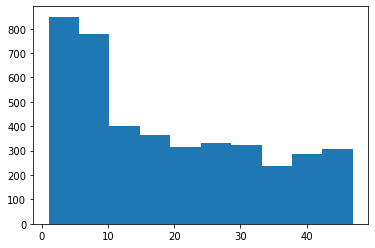

In [54]:
plt.hist(customer_join['membership_period'])

- 회원 기간이 10개월 이내인 고객이 많고, 10개월 이상의 고객 수는 거의 일정 (250 ~ 400)       
**-> 짧은 기간 (10개월)에 고객이 이탈하는 업계라는 것을 시사함**

## 탈퇴 회원 특징 파악
- 탈퇴 회원과 치속 회원의 차이 파악을 통해

In [56]:
customer_join['is_deleted'].value_counts()

0    2842
1    1350
Name: is_deleted, dtype: int64

In [57]:
customer_end = customer_join[customer_join['is_deleted'] == 1].copy()
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.062963
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.059736
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [58]:
customer_stay = customer_join[customer_join['is_deleted'] == 0].copy()
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


- 탈퇴 회원이 매월 이용 횟수의 평균값, 중앙값, 최대값, 최소값 모두 지속 회원보다 낮음
    - 특히 평균값과 중앙값의 차이는 약 1.5배 정도로 크게 차이남
    - 최대값의 경우 둘의 차이가 비교적 작음
- 정기적 이용 flag의 평균 값의 차이도 크게 남
    - 지속 회원의 평균은 0.98로 많은 회원이 정기적으로 이용하고 있음
    - 탈퇴 회원은 0.45로 절반 이상은 랜덤하게 이용하고 있음

----

- 추가적으로 기간별, 캠페인별, 회원기간별로 차이를 살펴보면 더 의미있는 결과 도출 가능할 것 같음 -> 다음 chpater에서 군집 이용해서 군집별 차이 살펴보기

In [70]:
customer_end['campaign_name'].value_counts() / len(customer_end) * 100

2_일반         52.518519
0_입회비반액할인    27.259259
1_입회비무료      20.222222
Name: campaign_name, dtype: float64

In [69]:
customer_stay['campaign_name'].value_counts() / len(customer_stay) * 100

2_일반         82.371569
0_입회비반액할인     9.922590
1_입회비무료       7.705841
Name: campaign_name, dtype: float64

- 탈퇴 회원의 캠페인으로 인한 유입 비중이 더 큼